<a href="https://colab.research.google.com/github/njadux/Computer-Vision/blob/Image-Classification/Fashion_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main goal of this project is to effectively classify images into different categories while incorporating early stopping to optimize training and prevent overfitting. It demonstrates the use of custom callbacks in TensorFlow/Keras for controlling the training process.



> Goal: Classify images from the Fashion MNIST dataset into categories while using early stopping to avoid overfitting and optimize training.


> Dataset: Fashion MNIST, consisting of 60,000 training images and 10,000 test images, with each image being a 28x28 grayscale picture of various fashion items.





Fashion datasets is a collection of grayscale 28x28

In [72]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

If we changed the epochs from 10 to 15 we will face the overfitting, to solve this we can pause the model training when accuracy reach 60

In [73]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>= 0.6):
      print("\n Reached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [74]:
callbacks = [myCallback()]

# Loading and visualizing data

Load dataset

In [75]:
fmnist = tf.keras.datasets.fashion_mnist

using load.data to train and test datasets

In [76]:
(training_images, training_labels),(test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


we can print a training image (image and numpy array) and label image

In [77]:
# we have 60,000 images so we can use 0 - 5999
index = 0

# setting num of rows when printing
np.set_printoptions(linewidth = 320)

#print the traininf label and image
print(f"labeled : {training_labels[index]}")
print(f"IMAGE IN PIXELS ARRAY : {training_images[index]}")

labeled : 9
IMAGE IN PIXELS ARRAY : [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   

Trying another index

In [78]:
index_x = 6000
np.set_printoptions(linewidth = 320)
print(f"labeled : {training_labels[index_x]}")
print(f"IMAGE IN PIXELS ARRAY : {training_images[index_x]}")

labeled : 8
IMAGE IN PIXELS ARRAY : [[  0   0   0   0   0   0   3   0   0   0  48  73  96 110 115 110 115 107  90  72  50  25   0   0   1   1   0   0]
 [  0   0   0   1   0   5   0  15 185 243 244 247 245 245 244 247 246 247 250 251 246 247 227  42   0   1   0   0]
 [  0   0   0   0   4   0   4 220 105  56 114  73  81  99  76  38 136  68  18  82  73  11 129 240   0   0   1   0]
 [  0   0   1   0   1   0 139 190   8 174  79  63  70 119  48 110  30  55 139 147  50 135   0 227 108   0   0   0]
 [  0   0   1   0   0   0 203 213   2 113 173 102 111 182  63   6 143  45  72 255  62   0  81 227 182   0   0   0]
 [  0   0   1   0   0   0 214 190 202  71  64 113 109 157  39 191 255  29 174 198  74  40 113 234 182   0   0   0]
 [  0   0   0   1   0  26 204 174  20  49 177  45   0 172   0 221 227  18  44  80  76 120   0 197 195   0   0   0]
 [  0   0   0   0  15 133 197 217 134 126 219 105 241 239 117 156 155 144 147 168 141 182 255 214 197 138   0   0]
 [  0   0   0   5 178 235 194 206   0  40 12

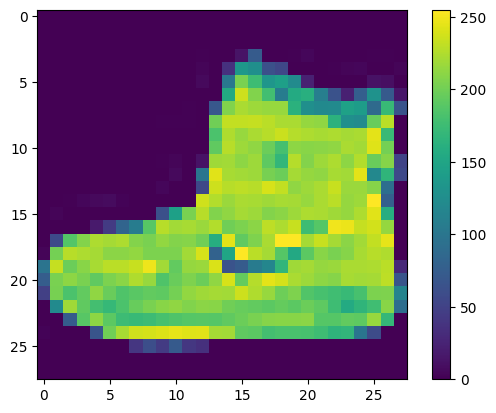

In [79]:
# visualize it using colormap
plt.imshow(training_images[index])
plt.colorbar()
plt.show()

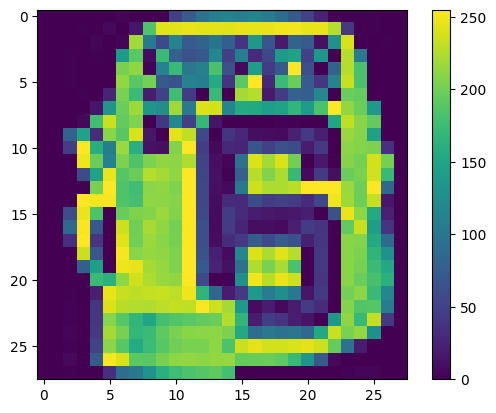

In [80]:
plt.imshow(training_images[index_x])
plt.colorbar()
plt.show()

# Training Model

Changing data to be between 0 and 1 by dividing it by 255 for better nn work
for the first layer

In [81]:
training_images = training_images / 255.0
test_images = test_images / 255.0

the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1

ReLU effectively means:

  **if x > 0:**
   - **return x**

 **else:**
   - **return 0**

In [82]:
# Build classification model
model = tf.keras.Sequential([
    tf.keras.Input(shape = (28,28)),
    tf.keras.layers.Flatten(), # takes the square of 28 x 28 and turns it into 1D
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax') # we need 10 clusters
])

it takes longer time but more accurate

In [83]:
# lets try different value for the dense layer with 512 neurons
model = tf.keras.Sequential([
    tf.keras.Input(shape = (28,28)),
    tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Softmax

Try to understand more about softmax

In [84]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1,8,3],
                   [4,5,6],
                   [7,8,9]
                  ])
inputs = tf.convert_to_tensor(inputs)

In [85]:
print(f"the input to softmax funtions :{inputs}")
print("#########################")
print(f"the input to softmax funtions in numpy:{inputs.numpy()}")

the input to softmax funtions :[[1 8 3]
 [4 5 6]
 [7 8 9]]
#########################
the input to softmax funtions in numpy:[[1 8 3]
 [4 5 6]
 [7 8 9]]


In [86]:
# feed the input to the softmax function
inputs = tf.cast(inputs, dtype=tf.float32) # changed data_type
outputs = tf.keras.activations.softmax(inputs)

In [87]:
# get sum of all values after softmax o/p
sum = tf.reduce_sum(outputs)
print(f"sum of outputs : {outputs}")

sum of outputs : [[9.0495922e-04 9.9240828e-01 6.6867946e-03]
 [9.0030573e-02 2.4472848e-01 6.6524094e-01]
 [9.0030573e-02 2.4472848e-01 6.6524094e-01]]


In [88]:
# get the index with highest value  # like the most num of pizza slices
predicting = np.argmax(outputs)
print(f"the class with highest probability is : {predicting}")

the class with highest probability is : 1


# Compile & Evaluate

In [89]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5, callbacks = [callbacks])

Epoch 1/5
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7958 - loss: 0.5828
 Reached 60% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.7958 - loss: 0.5826


Evaluation

In [90]:
# evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8445 - loss: 0.4464


[0.4596402943134308, 0.8391000032424927]

# Model Prediction

In [91]:
prediction = model.predict(test_images)
print(prediction[8807])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[2.3592700e-05 9.9600083e-01 1.8380487e-06 3.9562485e-03 1.3612839e-05 1.6243007e-07 2.0557939e-06 6.2821761e-09 1.4414001e-06 2.4892515e-07]


In [92]:
print(test_labels[8807])
print("############################")
print(f"prediction is : {prediction}")

1
############################
prediction is : [[7.6763672e-06 2.5417205e-07 2.5020154e-06 ... 4.3365136e-01 3.3096508e-03 4.8418614e-01]
 [1.1043646e-03 8.2741796e-09 9.9547118e-01 ... 1.3675466e-09 5.4360000e-05 3.0196423e-09]
 [2.7242138e-06 9.9999708e-01 5.2910649e-09 ... 4.5442083e-12 6.7205796e-09 5.4337906e-12]
 ...
 [7.9194688e-05 9.4690824e-09 4.5246175e-06 ... 3.4848270e-07 9.9981809e-01 3.3316237e-08]
 [1.2840134e-07 9.9999410e-01 4.1393271e-09 ... 3.7108630e-10 1.2076616e-08 7.5390405e-09]
 [8.3797373e-04 4.6294452e-05 3.9310186e-04 ... 1.3598077e-01 6.5286517e-02 2.5086727e-03]]


Confusion Matrix: Visualize the model's performance by showing the number of true positive, true negative, false positive, and false negative predictions.

Classification Report: Provide a detailed report with precision, recall, F1-score, and support for each class.

In [93]:
# Convert predictions to discrete class labels using argmax
# prediction is a matrix of shape (num_samples, num_classes)
# argmax along axis 1 gives the index of the highest probability for each sample

predict_classes = np.argmax(prediction, axis = 1)

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(test_labels, predict_classes)

**Precision**

*   Example: For class 0, a precision of 0.75 means that 75% of the instances predicted as class 0 are correctly classified.

---

**Recall**


*   Example: For class 0, a recall of 0.88 means that 88% of all true class 0 instances were correctly identified by the model.



---
**F1-score**


*   Example: For class 0, an F1-score of 0.81 indicates a good balance between precision and recall.


---

**Support**


*   Example: For class 0, the support is 1000, meaning there are 1000 samples of class 0 in the dataset.






> **Macro Average**: Every team is treated equally when calculating the overall score, even if some teams are much bigger. A score of 0.86 out of 1 means all teams did well on average.



> **Weighted Average**: Bigger teams have more influence on the overall score. A score of 0.86 out of 1 means the overall performance is still strong, even when team size differences are considered.





In [95]:
print(classification_report(test_labels, predict_classes))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81      1000
           1       0.94      0.97      0.96      1000
           2       0.73      0.78      0.75      1000
           3       0.92      0.79      0.85      1000
           4       0.69      0.82      0.75      1000
           5       0.98      0.90      0.94      1000
           6       0.83      0.38      0.52      1000
           7       0.85      0.98      0.91      1000
           8       0.86      0.98      0.92      1000
           9       0.94      0.87      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.83     10000
weighted avg       0.85      0.84      0.83     10000

